<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonDeepLearning/blob/main/Sentiment_Analysis_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis(감정분석)
네이버 영화 리뷰 데이터

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 0.Import Packages

In [3]:
import numpy as np 
import keras

## 1.Naver Sentiment Movie Corpus v1.0

### 1) File Download
* Train : 150000 
* Test : 50000

In [4]:
tr_url = 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt' 
path_to_train_file = keras.utils.get_file('train.txt', tr_url)

te_url = 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt' 
path_to_test_file = keras.utils.get_file('test.txt', te_url)

4898816/4893335 [==============================] - 0s 0us/step


### 2) 'X' Data
* 각 열은 Tab으로 구분 
* '0'-부정, '1'-긍정

In [5]:
train_text = open(path_to_train_file, 'rb').read().decode(encoding = 'utf-8') 
test_text = open(path_to_test_file, 'rb').read().decode(encoding = 'utf-8')

print('Length of text: {} characters'.format(len(train_text))) 
print('Length of text: {} characters'.format(len(test_text))) 
print()
print(train_text[:300])

Length of text: 6937271 characters
Length of text: 2318260 characters

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


### 3) 'y' Label
* 각 문장을 '\n'으로 분리 후 3열(index번호 2)의 값을 정수로 추출

In [8]:
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t')])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t')])

print(train_Y.shape, test_Y.shape) 
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


## 2.Data Cleaning

### 1) 'X' Data Cleaning
https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py

In [9]:
import re

def clean_str(string): 
  string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string) 
  string = re.sub(r"\'s", " \'s", string)
  string = re.sub(r"\'ve", " \'ve", string) 
  string = re.sub(r"n\'t", " n\'t", string) 
  string = re.sub(r"\'re", " \'re", string) 
  string = re.sub(r"\'d", " \'d", string) 
  string = re.sub(r"\'ll", " \'ll", string)
  string = re.sub(r",", " , ", string) 
  string = re.sub(r"!", " ! ", string) 
  string = re.sub(r"\(", " \( ", string) 
  string = re.sub(r"\)", " \) ", string) 
  string = re.sub(r"\?", " \? ", string) 
  string = re.sub(r"\s{2,}", " ", string) 
  string = re.sub(r"\'{2,}", "\'", string) 
  string = re.sub(r"\'", "", string)

  return string.lower()

train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0] 
train_text_X = [clean_str(sentence) for sentence in train_text_X]

### 2) 단어별 최대길이 조정 
* 문장 내 단어별 길이 확인

In [10]:
sentences = [sentence.split(' ') for sentence in train_text_X] 

for i in range(5): 
  print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


* 각 문장의 단어 길이 시각화

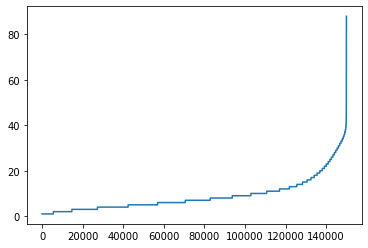

142587


In [11]:
import matplotlib.pyplot as plt

sentence_len = [len(sentence) for sentence in sentences] 
sentence_len.sort()

plt.plot(sentence_len) 
plt.show() 

print(sum([int(i <= 25) for i in sentence_len]))

* 단어의 앞에서부터 5글자로 자르기

In [12]:
sentences_new = []

for sentence in sentences: 
  sentences_new.append([word[:5] for word in sentence][:25])

sentences = sentences_new

for i in range(5): 
  print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


## 3.'tokenizer( )' and 'pad_sequences( )'

### 1) '20000'개 단어 사용

In [13]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 20000) 
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences) 

train_X = pad_sequences(train_X, padding = 'post') 

print(train_X[:5])

[[   25   884     8  5795  1111     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  588  5796  6697     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   71   346    31    35 10468     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  106  5338     4     2  2169   869   573     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


### 2) tokenizer( ) 동작 확인
* 존재하는 단어 매핑 
  * '경우는', '잊혀질'

In [14]:
print(tokenizer.index_word[19999]) 
print(tokenizer.index_word[20000])

temp = tokenizer.texts_to_sequences(['#$#$#', '경우는', '잊혀질', '연기가']) 
print(temp)

temp = pad_sequences(temp, padding = 'post') 
print(temp)

경우는
잊혀질
[[], [19999], [], [106]]
[[    0]
 [19999]
 [    0]
 [  106]]


## 4.Modeling

### 1) Model Structure

In [15]:
from keras import models, layers 

model = models.Sequential() 

model.add(layers.Embedding(20000, 300, input_length = 25))

model.add(layers.LSTM(32)) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(2, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 300)           6000000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                42624     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 66        
Total params: 6,042,690
Trainable params: 6,042,690
Non-trainable params: 0
_________________________________________________________________


### 2) Model Fit

In [16]:
%%time
history = model.fit(train_X, train_Y, 
                    epochs = 10, 
                    batch_size = 128, 
                    validation_split = 0.2)

Epoch 1/10
938/938 [==============================] - 89s 60ms/step - loss: 0.5133 - accuracy: 0.7197 - val_loss: 0.3906 - val_accuracy: 0.8191
Epoch 2/10
938/938 [==============================] - 55s 59ms/step - loss: 0.3214 - accuracy: 0.8526 - val_loss: 0.3954 - val_accuracy: 0.8200
Epoch 3/10
938/938 [==============================] - 56s 59ms/step - loss: 0.2656 - accuracy: 0.8748 - val_loss: 0.4333 - val_accuracy: 0.8152
Epoch 4/10
938/938 [==============================] - 55s 59ms/step - loss: 0.2211 - accuracy: 0.8935 - val_loss: 0.4958 - val_accuracy: 0.8155
Epoch 5/10
938/938 [==============================] - 55s 59ms/step - loss: 0.1891 - accuracy: 0.9083 - val_loss: 0.5676 - val_accuracy: 0.8061
Epoch 6/10
938/938 [==============================] - 56s 59ms/step - loss: 0.1608 - accuracy: 0.9219 - val_loss: 0.6690 - val_accuracy: 0.8017
Epoch 7/10
938/938 [==============================] - 55s 59ms/step - loss: 0.1449 - accuracy: 0.9270 - val_loss: 0.6837 - val_accuracy:

## 5.Validation

### 1) Visualization

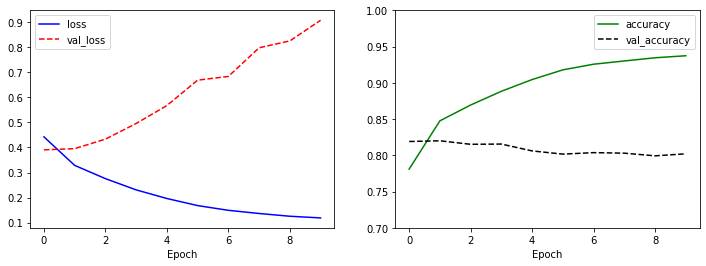

In [17]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1) 
plt.plot(history.history['loss'], 'b-', label = 'loss') 
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch') 
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy') 
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy') 
plt.xlabel('Epoch') 
plt.ylim(0.7, 1) 
plt.legend()

plt.show()

### 2) [Loss, Accuracy]

In [18]:
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0] 
test_text_X = [clean_str(sentence) for sentence in test_text_X] 

sentences = [sentence.split(' ') for sentence in test_text_X] 

sentences_new = []

for sentence in sentences: 
  sentences_new.append([word[:5] for word in sentence][:25]) 
sentences = sentences_new

test_X = tokenizer.texts_to_sequences(sentences) 
test_X = pad_sequences(test_X, padding = 'post')

model.evaluate(test_X, test_Y, verbose = 0)

[0.9175328612327576, 0.7958599925041199]

## 6.문장 감성 분석
* 입력 단어에 따라서 감성 분석 결과 변화 
  * 긍정('1') -> 부정('0')

In [19]:
test_sentence = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.' 
test_sentence = test_sentence.split(' ')

test_sentences = [] 
now_sentence = []

for word in test_sentence: 
  now_sentence.append(word)
  test_sentences.append(now_sentence[:])

test_X_1 = tokenizer.texts_to_sequences(test_sentences) 
test_X_1 = pad_sequences(test_X_1, padding = 'post', maxlen = 25)

prediction = model.predict(test_X_1)

for idx, sentence in enumerate(test_sentences): 
  print(sentence) 
  print(prediction[idx])

['재미있을']
[0.01441751 0.9855825 ]
['재미있을', '줄']
[0.02130678 0.97869325]
['재미있을', '줄', '알았는데']
[0.04396742 0.9560325 ]
['재미있을', '줄', '알았는데', '완전']
[0.01207152 0.98792845]
['재미있을', '줄', '알았는데', '완전', '실망했다.']
[0.01207152 0.98792845]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무']
[0.03124348 0.9687565 ]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고']
[9.9956006e-01 4.3992093e-04]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이']
[9.998636e-01 1.363852e-04]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
[9.998636e-01 1.363852e-04]
